In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = "CrossValidationResults/"

In [3]:
df = pd.DataFrame(columns=['name', 'precision', 'recall', "f1"])

In [4]:
i = 0
for exp_name in os.listdir(path):
    if "ipynb" not in exp_name:
        precision = []
        recall = []
        f1 = []
        for split in os.listdir(path+exp_name):
            if "ipynb" not in split:
                f = open(path + exp_name + "/" + split + "/Metrics.txt", 'r')
                text = f.read()
                #print(exp_name)
                #print(text.split("\n"))
                precision.append(float(text.split("\n")[-4].split(" ")[2]))
                recall.append(float(text.split("\n")[-3].split(" ")[2]))            
                f1.append(float(text.split("\n")[-2].split(" ")[2])) 
                f.close()
        df.loc[i] = [exp_name] + [np.mean(precision), np.mean(recall), np.mean(f1)]
        i += 1
        

In [5]:
df

,name,precision,recall,f1
0,20RecordsNormalizedRightFreq,0.849458,0.566808,0.656051
1,MixedLeadsLastEpoch,0.630216,0.318792,0.364886
2,Freq500,0.854180,0.686722,0.752122
3,20RecordsNormalizedRightFreqOnlyMoscow,0.742490,0.540640,0.615320
4,Freq500MixedLeads,0.536064,0.310290,0.351303
5,20RecordsNormalizedRightFreqSNEO&MC,0.810862,0.504830,0.603925
6,20RecordsNormalized,0.796903,0.569467,0.628880
7,13Records,0.802944,0.526837,0.611770
8,MixedLeads,0.670215,0.379990,0.463501
9,18RecordsNormalized,0.773036,0.588744,0.659240


# Some results visualisation

In [4]:
exp_names = ["20RecordsNormalizedRightFreq", "20RecordsNormalizedRightFreqOnlyMoscow", 
            "20RecordsNormalizedRightFreqSNEO&MC", "20RecordsNormalized", "MoscowRecordsNormalizedRightFreqSNEO&MC"]

In [12]:
df = pd.DataFrame(columns=['record name', 'exp name', 'precision', 'recall', "f1", "best epoch", "swi"])

In [13]:
def GetAllTableValues(rows, exp_name):
    name = rows[0].split("/")[1].split("=")[0]
    precision = float(rows[1].split(" ")[1])
    recall = float(rows[2].split(" ")[1])  
    f1 = float(rows[3].split(" ")[2])
    return name, exp_name, precision, recall, f1

In [14]:
for exp_name in exp_names:
    
    precision = []
    recall = []
    f1 = []
    for split in os.listdir(path+exp_name):
        if "ipynb" not in split:
            f = open(path + exp_name + "/" + split + "/Metrics.txt", 'r')
            text = f.read()
            be_f = open(path + exp_name + "/" + split + "/BestEpoch.txt", 'r')
            be = int(be_f.read())
            swi_f = open(path + exp_name + "/" + split + "/SWITrue", 'r')
            swi_text = swi_f.read()
            swi = float(swi_text.split("\n")[0])
            df.loc[len(df)] = list(GetAllTableValues(text.split("\n")[:4], exp_name)) + [be, swi]
            if len(text.split("\n")) > 9:
                swi = float(swi_text.split("\n")[1])
                df.loc[len(df)] = list(GetAllTableValues(text.split("\n")[4:8], exp_name)) + [be, swi]
            
            
#             precision.append(float(text.split("\n")[-4].split(" ")[2]))
#             recall.append(float(text.split("\n")[-3].split(" ")[2]))            
#             f1.append(float(text.split("\n")[-2].split(" ")[2])) 
            f.close()
            be_f.close()
            swi_f.close()
        
            
#     df.loc[i] = [exp_name] + [np.mean(precision), np.mean(recall), np.mean(f1)]


In [15]:
df = df.sort_values("record name")

In [8]:
df["record name"].unique()

array(['-2 marked.edf', '-3 marked.edf', '1.edf', '5_marked.edf',
       'DDD.edf', 'P1.edf', 'P10.edf', 'P11.edf', 'P12.edf', 'P1_2.edf',
       'P2.edf', 'P3.edf', 'P4.edf', 'P5.edf', 'P6.edf', 'P9.edf',
       'SDA.edf', 'SVV.edf', 'ZSV.edf', 'patient4.edf'], dtype=object)

In [12]:
df["exp name"].unique()

array(['20RecordsNormalizedRightFreqSNEO&MC', '20RecordsNormalized',
       '20RecordsNormalizedRightFreq',
       'MoscowRecordsNormalizedRightFreqSNEO&MC',
       '20RecordsNormalizedRightFreqOnlyMoscow'], dtype=object)

<Axes: xlabel='record name', ylabel='f1'>

<Figure size 1600x900 with 0 Axes>

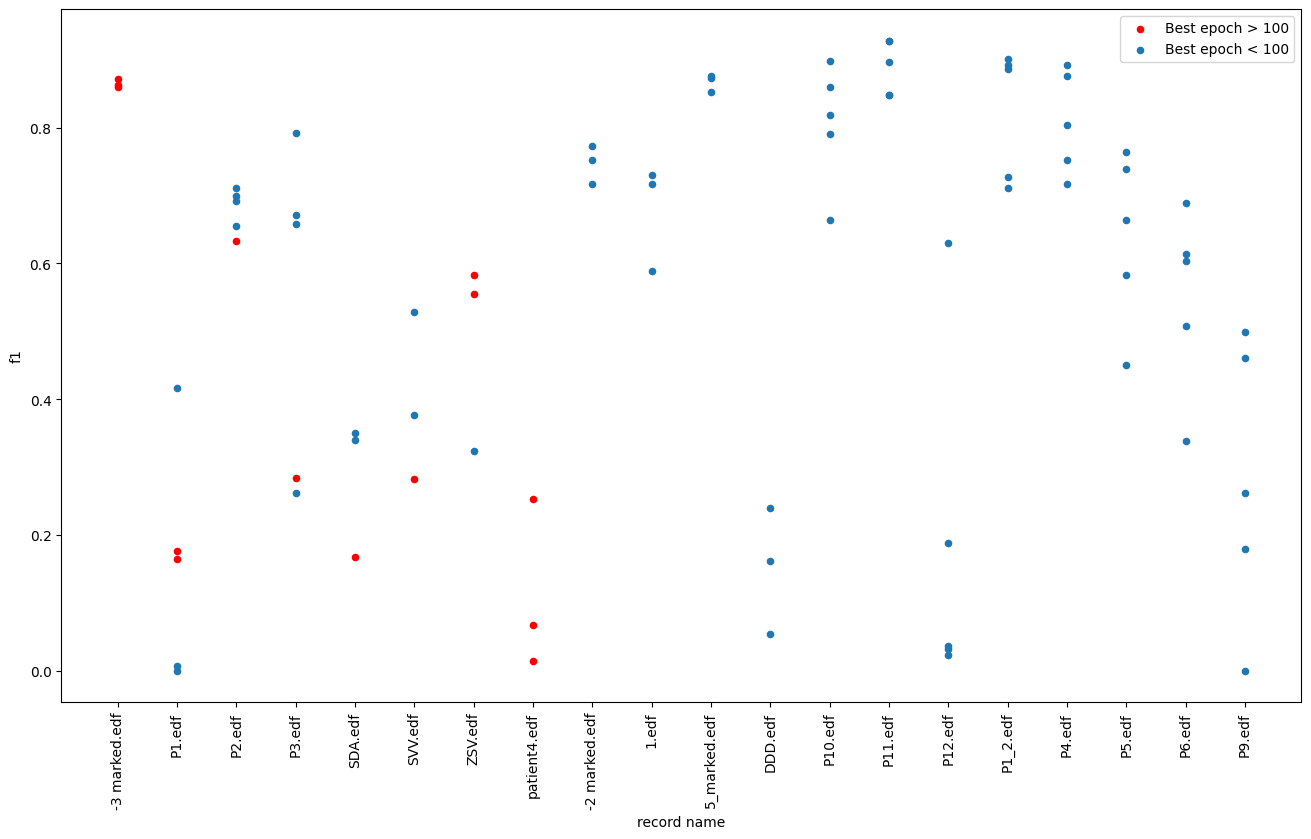

In [9]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["best epoch"] > 100].plot(x="record name", y = "f1", kind="scatter", rot=90, color="red", label="Best epoch > 100")
df[df["best epoch"] < 100].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label="Best epoch < 100")

<Axes: xlabel='record name', ylabel='f1'>

<Figure size 1600x900 with 0 Axes>

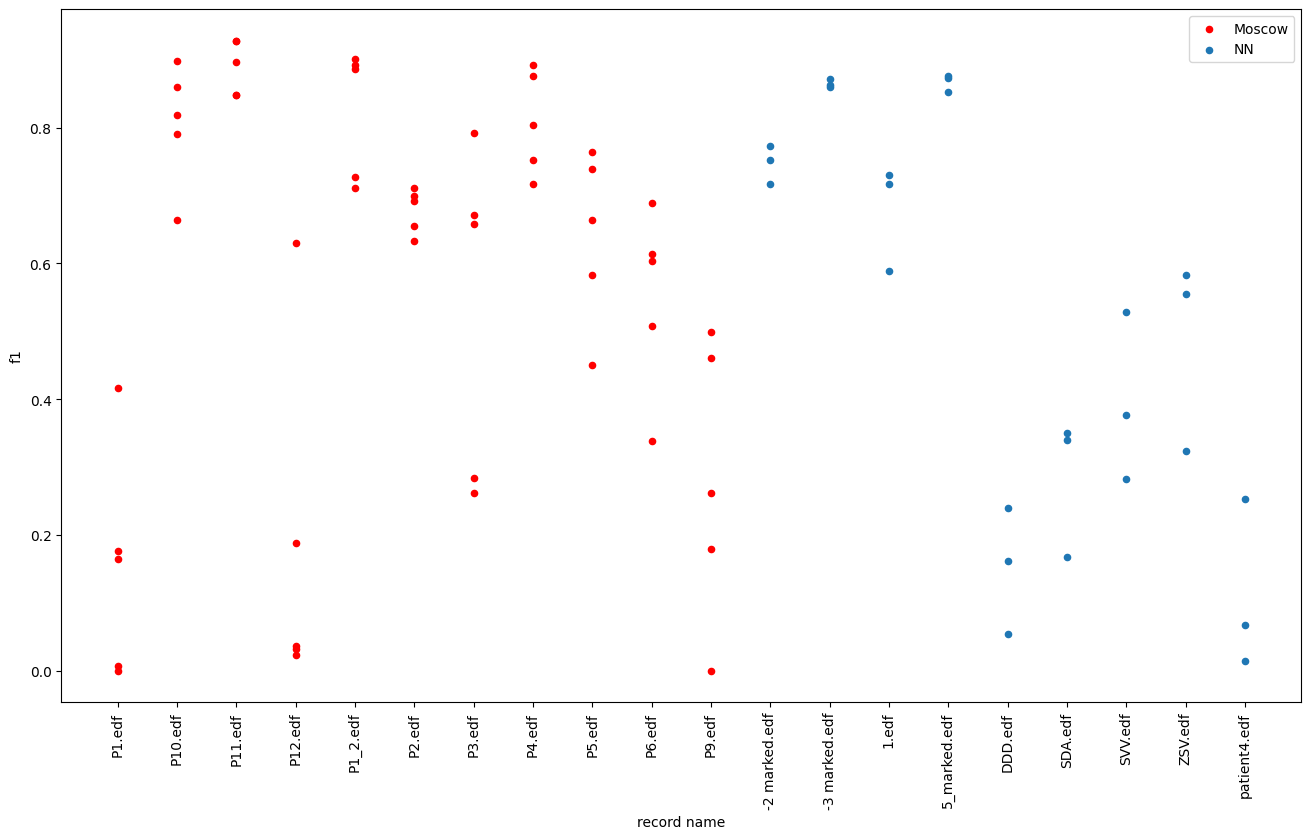

In [43]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["record name"].str.match('P')].plot(x="record name", y = "f1", kind="scatter", rot=90, color="red", label="Moscow")
df[(1- df["record name"].str.match('P')).astype("bool")].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label="NN")

<Axes: xlabel='record name', ylabel='f1'>

<Figure size 1600x900 with 0 Axes>

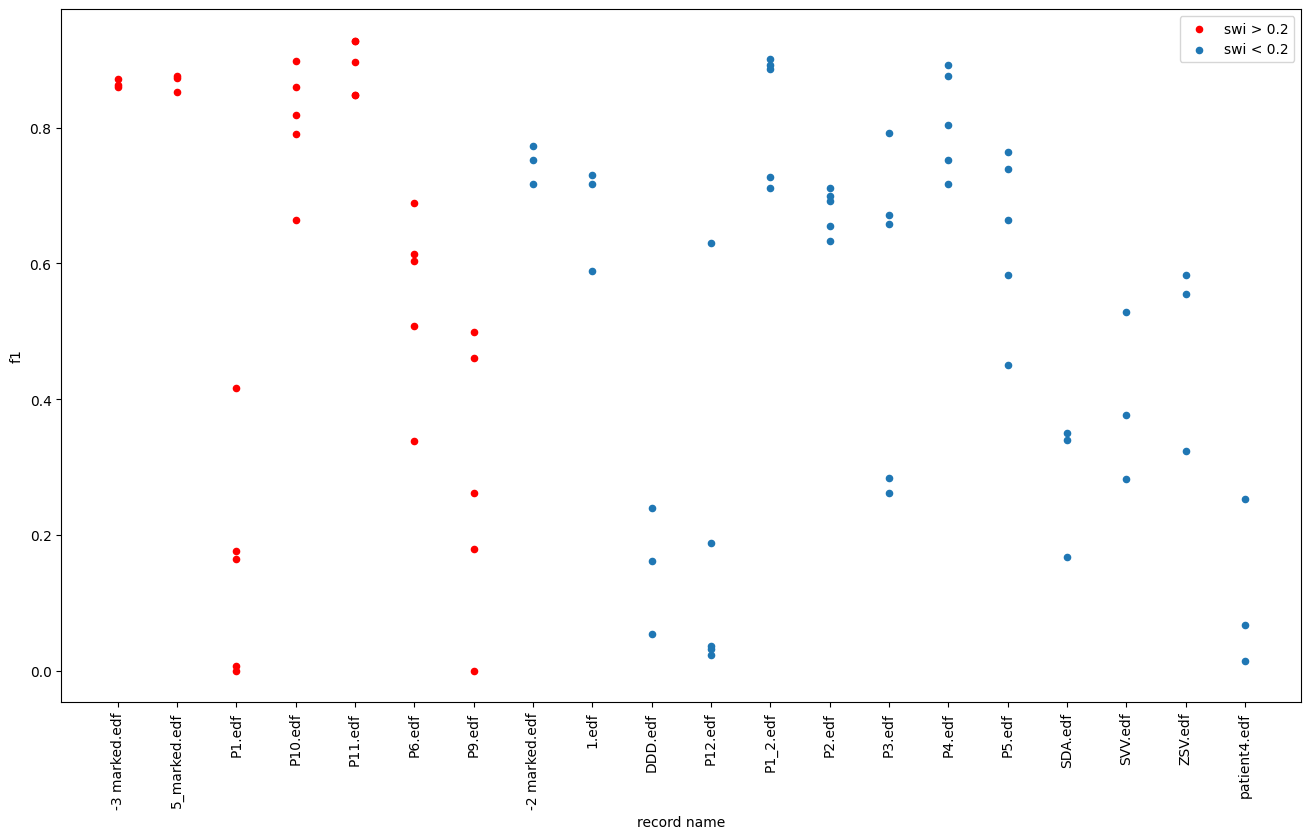

In [44]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["swi"] > 0.2].plot(x="record name", y = "f1", kind="scatter", rot=90, color="red", label="swi > 0.2")
df[df["swi"] < 0.2].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label="swi < 0.2")

In [10]:
colors = ["red", "blue", "yellow", "green", "orange"]

<Figure size 1600x900 with 0 Axes>

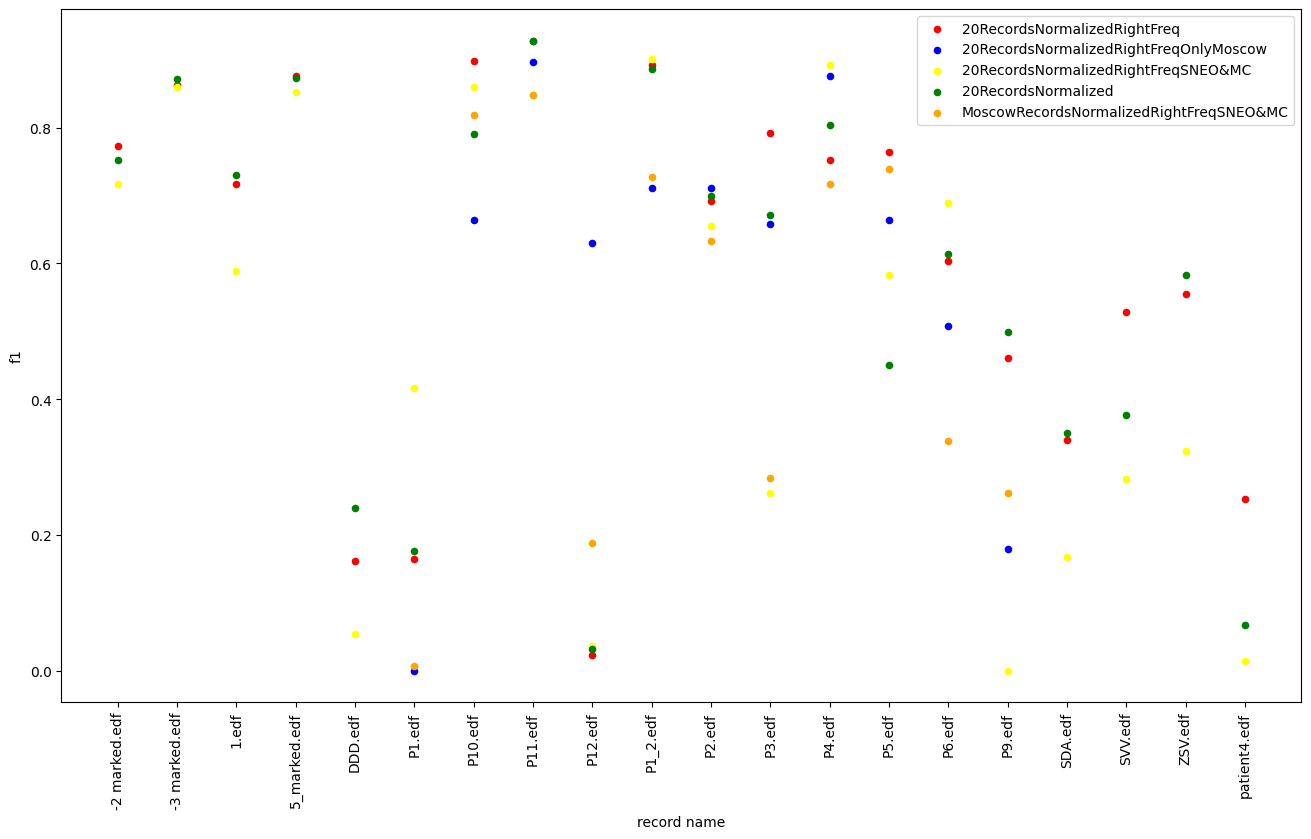

In [17]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["exp name"] == exp_names[0]].plot(x="record name", y = "f1", kind="scatter", rot=90, color=colors[0], label=exp_names[0])
for i, exp_name in enumerate(exp_names[1:]):
    df[df["exp name"] == exp_name].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label=exp_name, color = colors[i+1])

<Axes: xlabel='record name', ylabel='swi'>

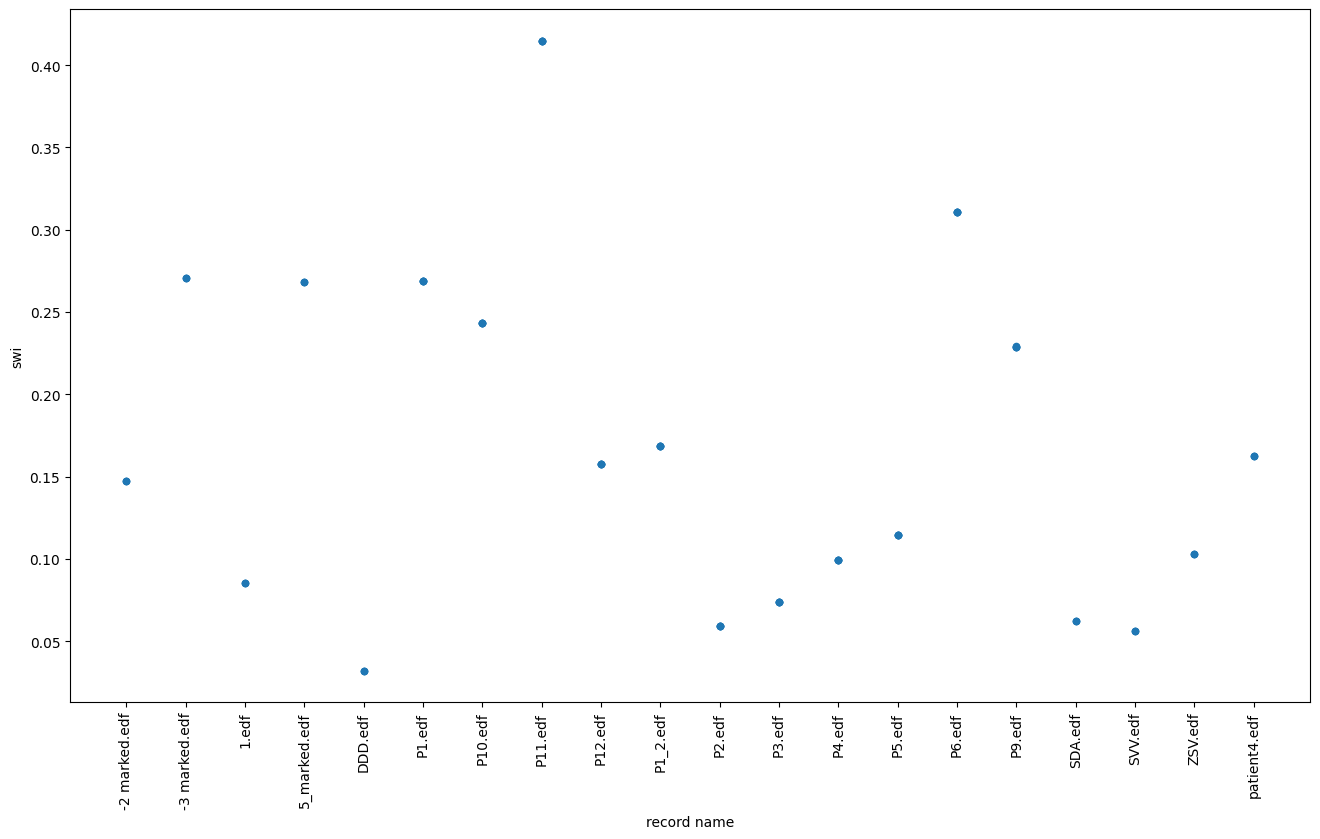

In [21]:
df.plot(x="record name", y = "swi", kind="scatter", rot=90)

<Axes: xlabel='record name', ylabel='best epoch'>

<Figure size 1600x900 with 0 Axes>

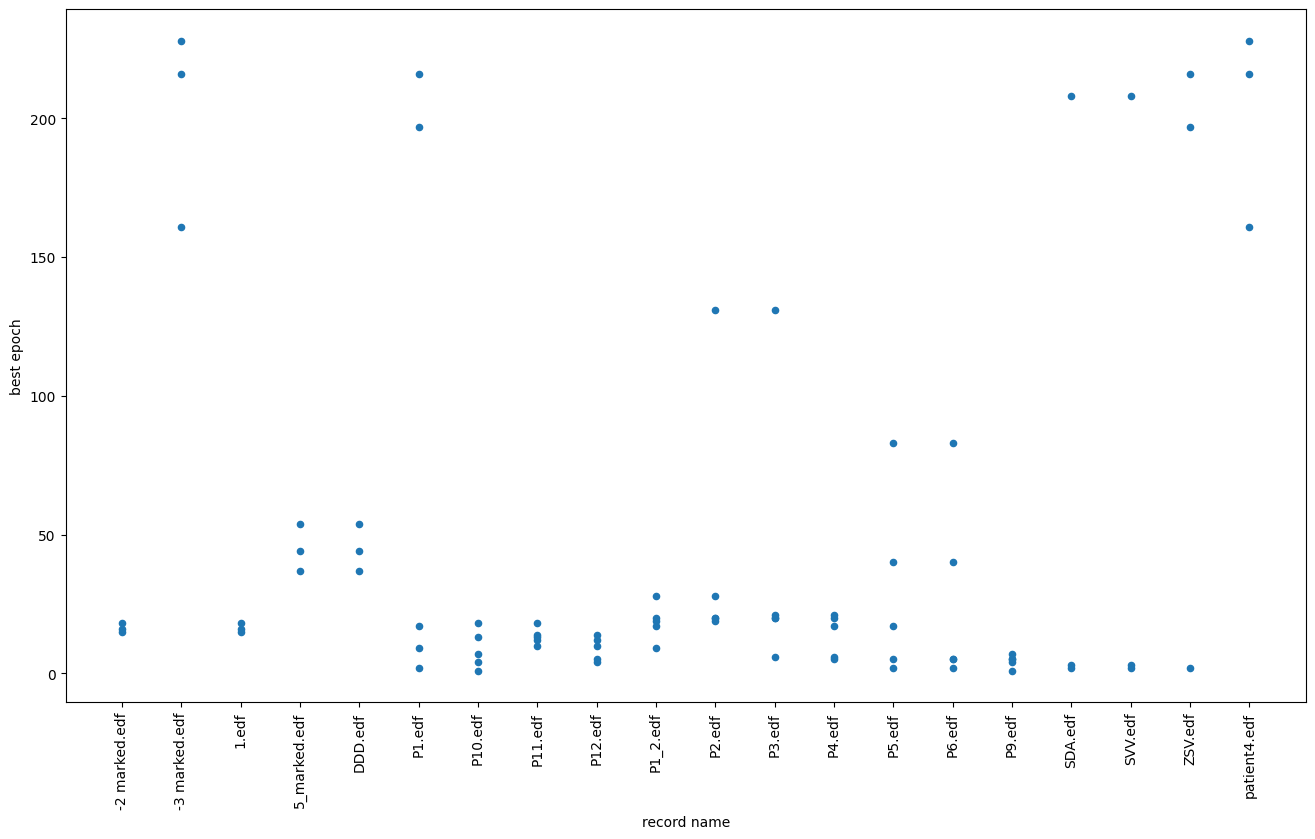

In [20]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
df.plot(x="record name", y = "best epoch", kind="scatter", rot=90)

<Axes: xlabel='record name', ylabel='recall'>

<Figure size 1600x900 with 0 Axes>

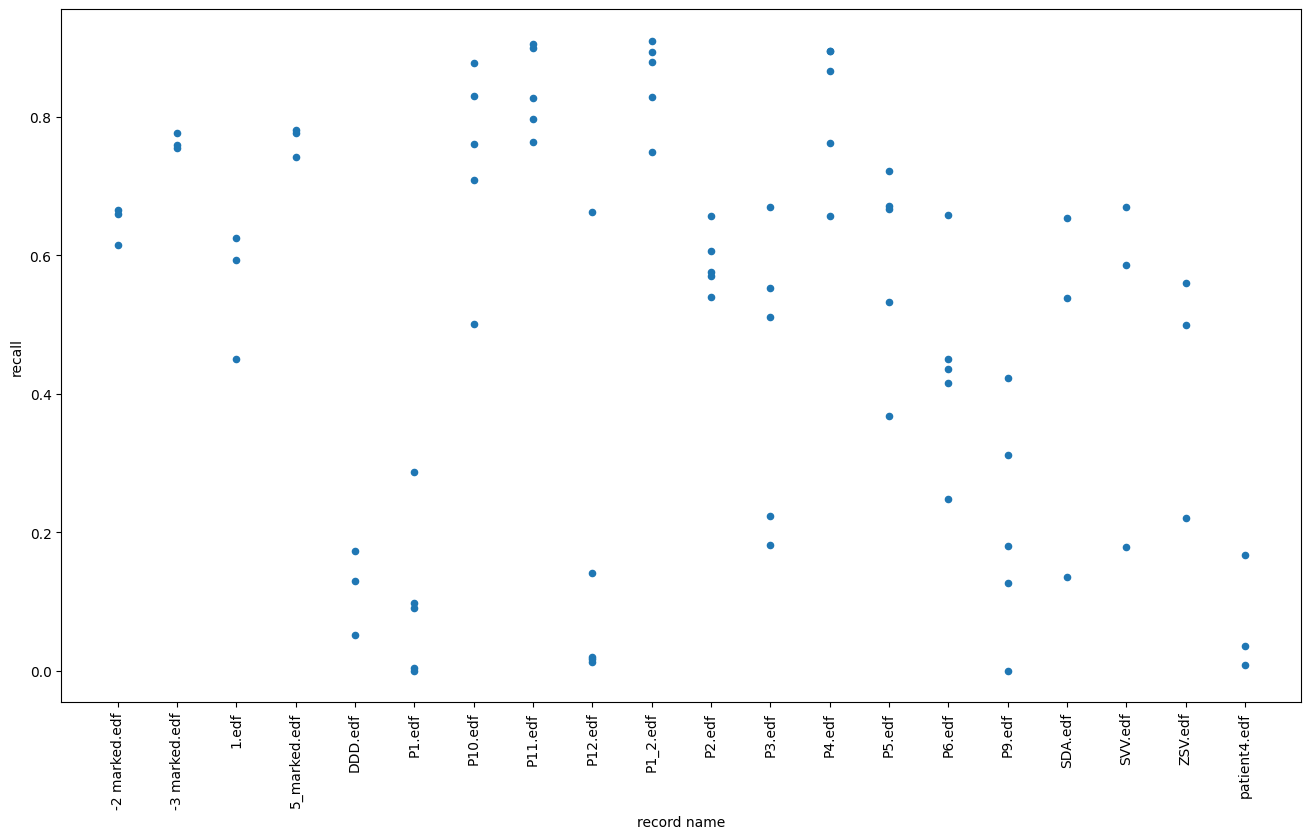

In [17]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
df.plot(x="record name", y = "recall", kind="scatter", rot=90)

<Axes: xlabel='record name', ylabel='precision'>

<Figure size 1600x900 with 0 Axes>

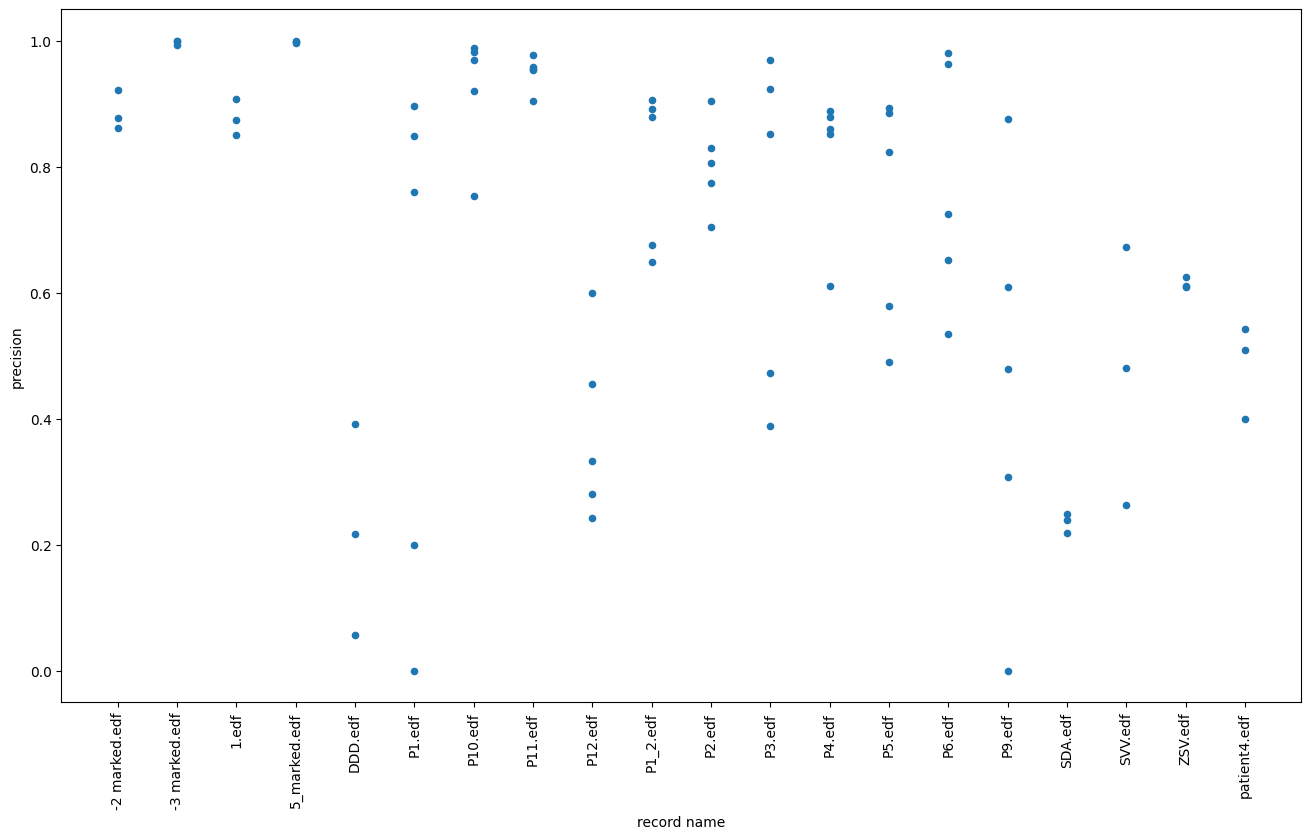

In [19]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
df.plot(x="record name", y = "precision", kind="scatter", rot=90)